In [2]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("/home/riri/Desktop/Soiling/datasets/soiling.csv")
df.head()

,client,gender,age,hours_slept,sleep_quality,main_food_taken,food_taken_amount,drink,temperature(deg),exercise,medication,breakfast_time,lunch_time,supper_time,visit_restroom,times_visited,avg_relieve_time(min),soiled
0,Fox,Female,8,8,Excellent,Ugali,Normal,Porridge,23.8,Yes,Yes,08:14,13:30,19:31,Yes,3,16,No
1,Charlton,Female,7,8,Excellent,Chapati,Small,Milk,23.2,No,Yes,08:53,12:32,18:28,No,0,18,No
2,Iqbal,Male,7,7,Excellent,Meat,Heavy,Porridge,18.7,No,Yes,09:43,13:22,19:23,No,0,19,No
3,Marc,Female,10,7,Excellent,Snacks,Normal,Coffee,18.2,No,No,09:46,13:16,19:32,No,0,22,Yes
4,King,Female,14,6,Good,Veggies,Normal,Water,20.1,Yes,No,08:57,13:55,18:05,Yes,4,18,No


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,28532.0,7.984088,2.021499,-1.0,7.0,8.0,9.0,16.0
hours_slept,28532.0,6.992955,1.038152,3.0,6.0,7.0,8.0,12.0
temperature(deg),28532.0,20.476626,3.530242,7.3,18.1,20.5,22.9,34.7
times_visited,28532.0,1.513634,1.669912,0.0,0.0,1.0,3.0,7.0
avg_relieve_time(min),28532.0,20.005327,2.029722,12.0,19.0,20.0,21.0,28.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28532 entries, 0 to 28531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client                 28532 non-null  object 
 1   gender                 28532 non-null  object 
 2   age                    28532 non-null  int64  
 3   hours_slept            28532 non-null  int64  
 4   sleep_quality          28532 non-null  object 
 5   main_food_taken        28532 non-null  object 
 6   food_taken_amount      28532 non-null  object 
 7   drink                  28532 non-null  object 
 8   temperature(deg)       28532 non-null  float64
 9   exercise               28532 non-null  object 
 10  medication             28532 non-null  object 
 11  breakfast_time         28532 non-null  object 
 12  lunch_time             28532 non-null  object 
 13  supper_time            28532 non-null  object 
 14  visit_restroom         28532 non-null  object 
 15  ti

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


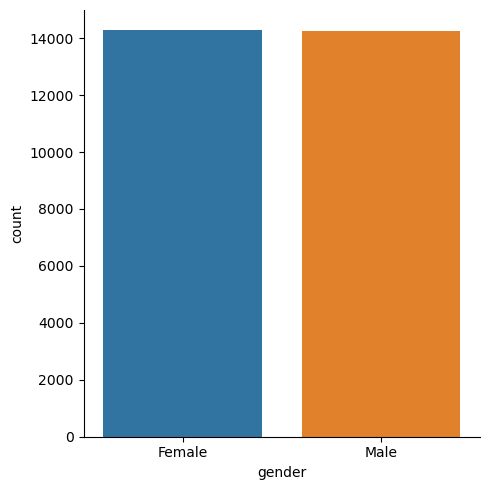

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


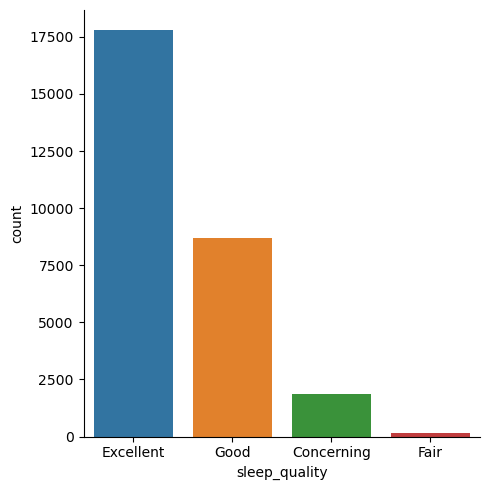

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


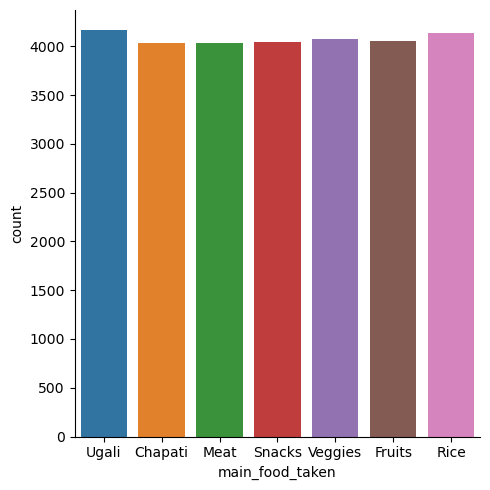

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


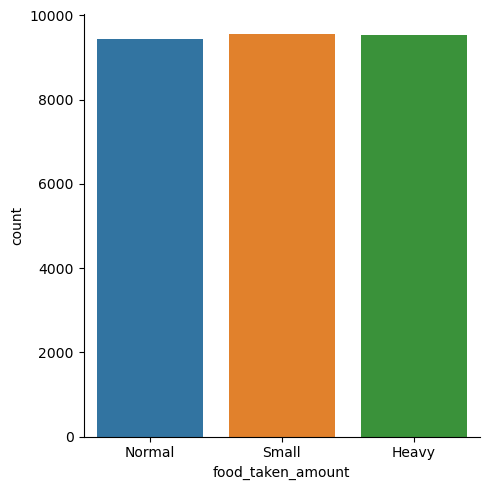

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


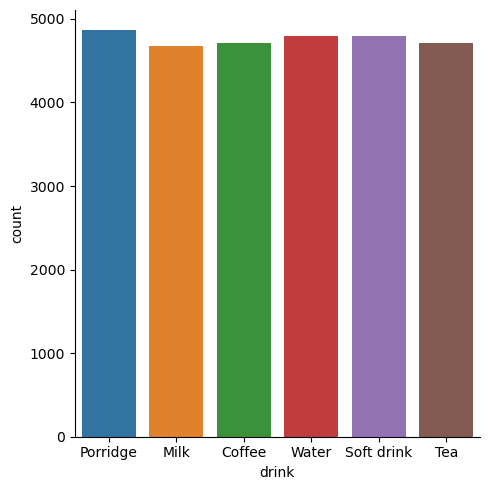

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


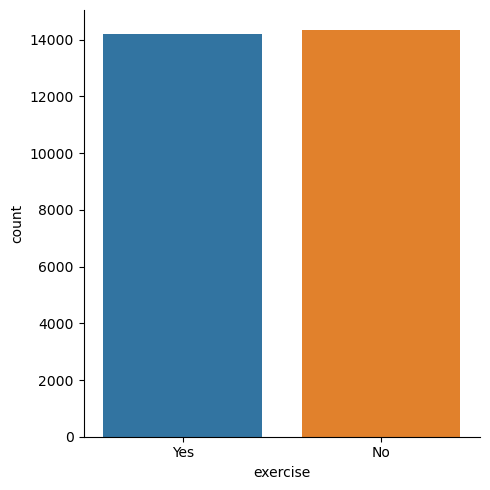

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


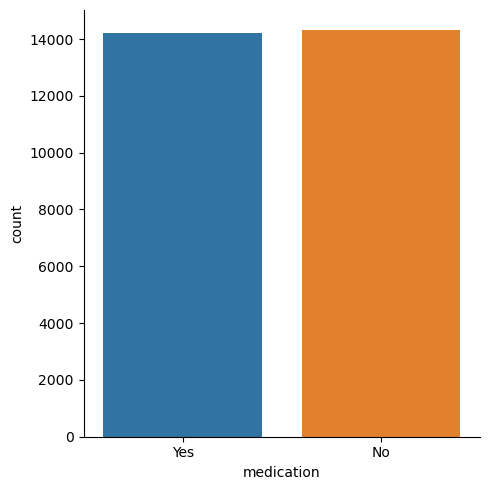

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


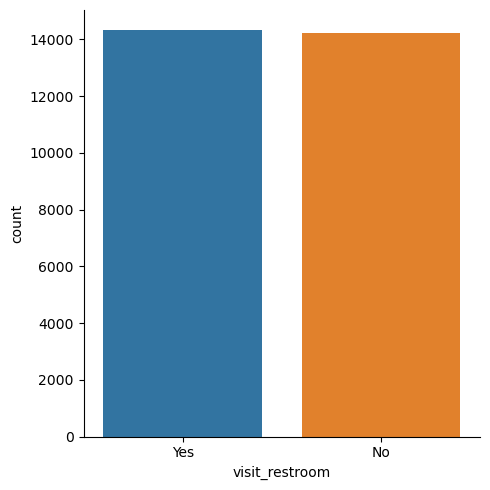

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_205949/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


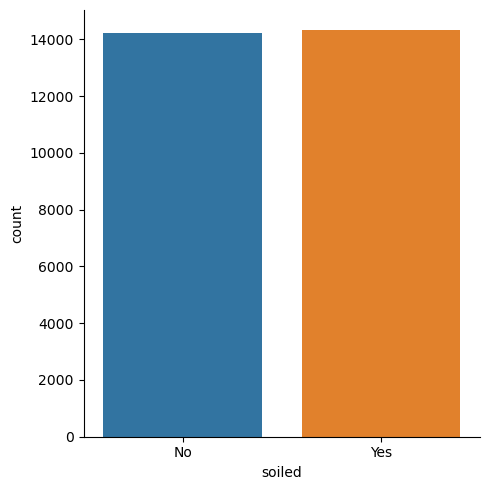

In [6]:
for col in df.select_dtypes(include=['object', 'category']):
    if col not in ['client', 'breakfast_time', 'lunch_time', 'supper_time']:
        sns.catplot(data=df, x=col, kind="count")
        plt.tight_layout()
        plt.show();

In [7]:
df.drop(columns=['client', 'soiled'])

for col in df.select_dtypes(include=['object']):
    if col not in ('client', 'soiled'):
        ct = pd.crosstab(df['soiled'], df[col])
        chi, p_value, dof, expected = chi2_contingency(ct) 
        if p_value <= 0.05:
            hypo = "Reject"
        else:
            hypo = "Accept"
            
        print(f"************** {str(col).replace('_', ' ').title()}: {df[col].nunique()} **************")
        print(f"chi: {chi:.5f}\np-value: {p_value:.5f}\nDegree: {dof}\nNull Hypothesis: {hypo}\n")

************** Gender: 2 **************
chi: 0.15302
p-value: 0.69566
Degree: 1
Null Hypothesis: Accept

************** Sleep Quality: 4 **************
chi: 0.16596
p-value: 0.98289
Degree: 3
Null Hypothesis: Accept

************** Main Food Taken: 7 **************
chi: 5.82138
p-value: 0.44349
Degree: 6
Null Hypothesis: Accept

************** Food Taken Amount: 3 **************
chi: 3.50512
p-value: 0.17333
Degree: 2
Null Hypothesis: Accept

************** Drink: 6 **************
chi: 1.64822
p-value: 0.89536
Degree: 5
Null Hypothesis: Accept

************** Exercise: 2 **************
chi: 0.01472
p-value: 0.90344
Degree: 1
Null Hypothesis: Accept

************** Medication: 2 **************
chi: 0.74401
p-value: 0.38838
Degree: 1
Null Hypothesis: Accept

************** Breakfast Time: 121 **************
chi: 146.50393
p-value: 0.05037
Degree: 120
Null Hypothesis: Accept

************** Lunch Time: 91 **************
chi: 81.55413
p-value: 0.72583
Degree: 90
Null Hypothesis: Accept

**

In [8]:
df.duplicated(subset=['client', 'age', 'gender']).sum()

14572

In [9]:
df.columns

Index(['client', 'gender', 'age', 'hours_slept', 'sleep_quality',
       'main_food_taken', 'food_taken_amount', 'drink', 'temperature(deg)',
       'exercise', 'medication', 'breakfast_time', 'lunch_time', 'supper_time',
       'visit_restroom', 'times_visited', 'avg_relieve_time(min)', 'soiled'],
      dtype='object')

In [10]:
data = df.drop_duplicates(keep='first')

X = data.drop(columns=['client', 'breakfast_time', 'lunch_time', 'supper_time', 'soiled'], axis=1)
y = data['soiled']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


def preprocess_inputs(data: pd.DataFrame):
    cat_columns = [col for col in data.select_dtypes(include=['object', 'category'])]
    num_columns = [col for col in data.select_dtypes(include=['int', 'float'])]
    
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False))
    ])
    
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])  
        
    transformer = ColumnTransformer(transformers=[
        ("categorical", cat_pipe, cat_columns),
        ("numerical", num_pipe, num_columns)
    ])
    
    preprocessed = transformer.fit_transform(data)
    
    return preprocessed

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)
new_x = preprocess_inputs(X)

X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape

((21399, 33), (7133, 33), (21399,))

In [14]:
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
import numpy as np

def run_classifier(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray):
    scores = []
    
    # kfold = StratifiedKFold()
    
    # for (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    #     X_train, X_test = X[train_idx], 
        
        
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    return score

In [15]:
lr = LogisticRegression()
run_classifier(lr, X_train, y_train, X_test, y_test)

0.4967054535258657

In [16]:
xgb = XGBClassifier()
run_classifier(xgb, X_train, y_train, X_test, y_test)

0.5098836394224029

In [17]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [18]:
xgb.score(X_train, y_train)

0.7327912519276601

In [19]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

          No       0.51      0.50      0.51      3560
         Yes       0.51      0.52      0.51      3573

    accuracy                           0.51      7133
   macro avg       0.51      0.51      0.51      7133
weighted avg       0.51      0.51      0.51      7133



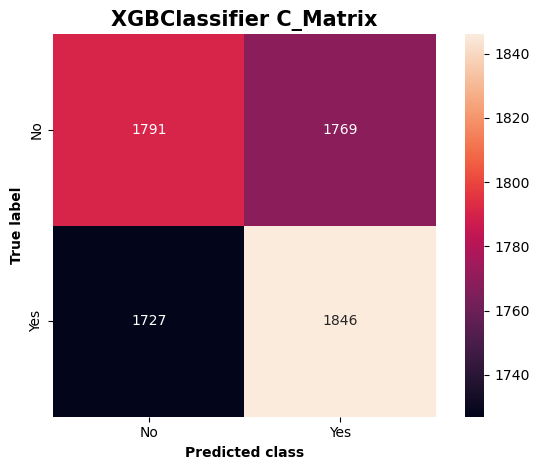

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, cbar=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBClassifier C_Matrix", weight='bold', size=15)
plt.xlabel("Predicted class", weight="bold", size=10)
plt.ylabel("True label", weight='bold', size=10)
plt.tight_layout()
plt.show();

In [50]:
DIR = '..'
MODELS_DIR = os.path.join(DIR, 'models')
os.makedirs(MODELS_DIR, exist_ok=True)

xgb_path = os.path.join(MODELS_DIR, 'xgb.pkl')
with open(file_path, 'wb') as file:
    pickle.dump(xgb, file, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
with open(file_path, 'rb') as file:
    model = pickle.load(file)

model.score(X_train, y_train)

0.7327912519276601

In [45]:
len(X_test[:10])

10

In [46]:
model.predict_proba(X_test[:1])

ValueError: Feature shape mismatch, expected: 33, got 13

In [75]:
from catboost import CatBoostClassifier

X = X.drop(['avg_relieve_time(min)'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [76]:
cat = CatBoostClassifier(iterations=1000, learning_rate=0.001, depth=5)
cats = [ col for col in X.select_dtypes(include=['object', 'category'])]
cats

['gender',
 'sleep_quality',
 'main_food_taken',
 'food_taken_amount',
 'drink',
 'exercise',
 'medication',
 'visit_restroom']

In [77]:
cat.fit(X_train, 
        y_train,
        cat_features=cats,
        eval_set=[(X_test, y_test)],
        verbose=0)

In [78]:
cat.score(X_train, y_train)

0.5102738225629792

In [79]:
cat.score(X_test, y_test)

0.5000876117049238

In [80]:
cat.predict(X_test[:5])

array([1, 1, 1, 1, 1])

In [81]:
cat.predict_proba(X_test[:5])

array([[0.49989449, 0.50010551],
       [0.49999893, 0.50000107],
       [0.49995726, 0.50004274],
       [0.49993542, 0.50006458],
       [0.49995845, 0.50004155]])

In [82]:
labels = {0: 'No', 1: 'Yes'}

In [105]:
np.max(cat.predict_proba(X_test[:1]).round(4) * 100)

50.01

In [99]:
cat_path = os.path.join(MODELS_DIR, 'catboost.pkl')
with open(cat_path, 'wb') as file:
    pickle.dump(cat, file, protocol=pickle.HIGHEST_PROTOCOL)

In [100]:
prediction = cat.predict(X_test[:1])

In [101]:
cat.feature_names_

['gender',
 'age',
 'hours_slept',
 'sleep_quality',
 'main_food_taken',
 'food_taken_amount',
 'drink',
 'temperature(deg)',
 'exercise',
 'medication',
 'visit_restroom',
 'times_visited']

In [121]:
X_train[:1].values.tolist()

[['Female',
  6,
  6,
  'Good',
  'Veggies',
  'Normal',
  'Porridge',
  18.5,
  'No',
  'Yes',
  'No',
  0]]

In [122]:
cat.predict(X_train[:1].values.tolist())

array([1])